In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load the data into the pandas environment and identify some basic details of the dataset

In [2]:
df=pd.read_csv('employee.csv')
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# 2. Reset the index as "name".

In [4]:
df.set_index('name',inplace=True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills

In [5]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [6]:
df[(df['department']=='Sales') | (df['department']=='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [7]:
df[df['performance_score']>700].index

Index(['Allen Smith', 'Dheeraj Patel', 'Josh Wills', 'Leo Duck'], dtype='object', name='name')

# 6. Display employee who has more than 500 and less than 700 performance score

In [8]:
df[(df['performance_score']>500) & (df['performance_score']<700)].index

Index(['S Kumar', 'Jack Morgan', 'Ying Chin', 'Satyam Sharma'], dtype='object', name='name')

# 7. Check and handle missing values in the dataset.

In [9]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [10]:
for i in ['age','income']:
    df[i]=df[i].fillna(df[i].mean())

In [11]:
for j in ['gender']:
    df[j]=df[j].fillna(df[j].mode()[0])
   

In [12]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,F,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,F,Sales,G3,649
James Authur,54.000000,52857.142857,F,Operations,G3,53
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


In [13]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

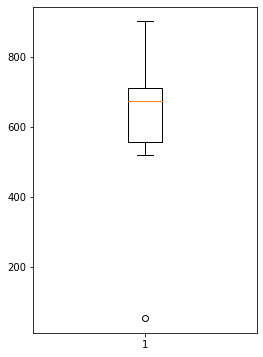

In [14]:
plt.figure(figsize=(4,6))
plt.boxplot(df['performance_score'])
plt.show()

In [15]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint') 
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3-1.5*IQR



In [16]:
outlier=[]
for x in df['performance_score']:
    if((x<low_lim) or (x>up_lim)):
        outlier.append(x)


In [17]:
ind1=df['performance_score']<low_lim
df.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [18]:
df.drop(['James Authur'],inplace=True)


In [19]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,F,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,F,Sales,G3,649
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


# . Check the gender column and do Dummy encoding.

In [20]:
df.gender.nunique()

2

In [21]:
df_dummy=pd.get_dummies(df['gender'], prefix='gender', columns='male', drop_first=True,)
df_dummy

,gender_M
name,
Allen Smith,0
S Kumar,0
Jack Morgan,1
Ying Chin,0
Dheeraj Patel,0
Satyam Sharma,0
Josh Wills,0
Leo Duck,1


# 10.Do the standard scaling on the feature performance score.

In [22]:
df['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [23]:
converted_array =np.array(df['performance_score']).reshape(-1, 1) 

from sklearn import preprocessing 

standardisation = preprocessing.StandardScaler()
df_StdScaled = standardisation.fit_transform(converted_array)

df_StdScaled = pd.DataFrame(df_StdScaled)
df_StdScaled.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
